<h1> Isfund: Updates</h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path = 'Resources/average_student_loan_debt.csv' 
df_loans = pd.read_csv(file_path)

df_loans.head()

,Graduating Class,Average Student Loan Debt
0,1993,"9,320.00"
1,1994,"10,349.00"
2,1995,"11,491.00"
3,1996,"12,759.00"
4,1997,"13,767.00"


In [3]:
# Cleaning the dataset
df_loans.columns = df_loans.columns.str.strip()  # Remove extra spaces from column names
df_loans['Average Student Loan Debt'] = df_loans['Average Student Loan Debt'].str.replace(',', '').astype(float)  # Remove commas and convert to float


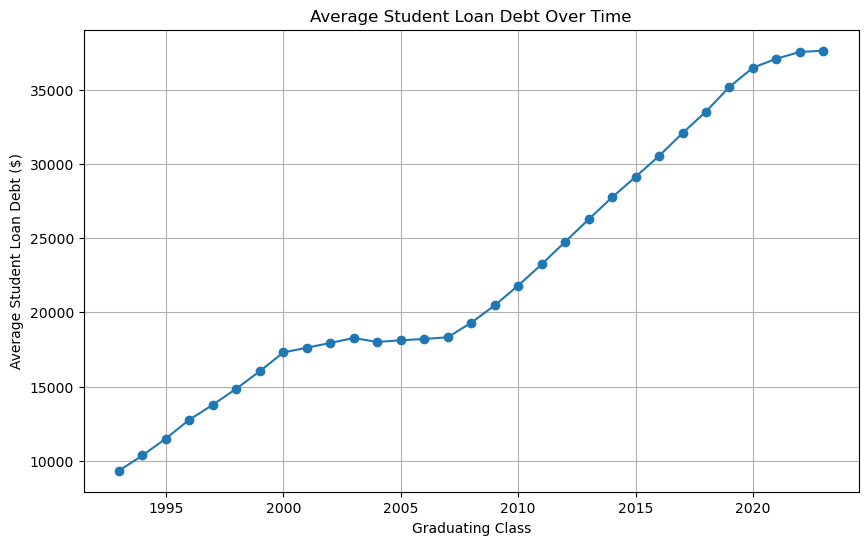

In [4]:
# Create the plot and add labels
plt.figure(figsize=(10, 6))
plt.plot(df_loans['Graduating Class'], df_loans['Average Student Loan Debt'], marker='o')

plt.title('Average Student Loan Debt Over Time')
plt.xlabel('Graduating Class')
plt.ylabel('Average Student Loan Debt ($)')
plt.grid(True)

plt.show()

In [5]:
# Load dataset #2 to work on the correlation analysis
file_pathtwo = 'Resources/number_houses_sold.csv' 
df = pd.read_csv(file_pathtwo)

df.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560,87.0,134.0,199.0,141.0
1,1964.0,565,90.0,146.0,200.0,129.0
2,1965.0,575,94.0,142.0,210.0,129.0
3,1966.0,461,84.0,113.0,166.0,99.0
4,1967.0,487,77.0,112.0,179.0,119.0


In [6]:
#Cleaning the dataset #2
df['Total by Regions'] = df[['Northeast', 'MidWest', 'South', 'West']].sum(axis=1)
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
print("Cleaned Data:")
print(df[['Year', 'Total by Regions']].head())


Cleaned Data:
   Year  Total by Regions
0  1963             561.0
1  1964             565.0
2  1965             575.0
3  1966             462.0
4  1967             487.0


In [7]:
#average homes sold per year
average_total_by_year = df.groupby('Year')['Total by Regions'].mean().reset_index()

average_total_by_year.columns = ['Year', 'Average Total by Year (Thousands)']


print("Average Total by Year DataFrame:")
print(average_total_by_year)

Average Total by Year DataFrame:
    Year  Average Total by Year (Thousands)
0   1963                              561.0
1   1964                              565.0
2   1965                              575.0
3   1966                              462.0
4   1967                              487.0
..   ...                                ...
56  2019                              683.0
57  2020                              822.0
58  2021                              771.0
59  2022                              641.0
60  2023                              668.0

[61 rows x 2 columns]


In [8]:
#exporting the new dataset with the averages to csv
output_file_path = 'Resources/average_number_of_house_sold_by_year_output.csv'
average_total_by_year.to_csv(output_file_path, index=False)


In [9]:
#loading the new dataset
df_homes = pd.read_csv(output_file_path)
df_homes.head()

,Year,Average Total by Year (Thousands)
0,1963,561.0
1,1964,565.0
2,1965,575.0
3,1966,462.0
4,1967,487.0


In [10]:
#Descriptive Statistics: 1. avg # of homes sold by year & 2. avg student loan debt by year
home_stats = df_homes.describe()
loan_stats = df_loans.describe()

home_stats, loan_stats

(              Year  Average Total by Year (Thousands)
 count    61.000000                          61.000000
 mean   1993.000000                         655.131148
 std      17.752934                         201.924613
 min    1963.000000                         306.000000
 25%    1978.000000                         509.000000
 50%    1993.000000                         641.000000
 75%    2008.000000                         757.000000
 max    2023.000000                        1282.000000,
        Graduating Class  Average Student Loan Debt
 count         31.000000                  31.000000
 mean        2008.000000               22752.645161
 std            9.092121                8737.249405
 min         1993.000000                9320.000000
 25%         2000.500000               17456.500000
 50%         2008.000000               19300.000000
 75%         2015.500000               29845.000000
 max         2023.000000               37650.000000)

In [32]:
# Checking the unique years in each dataset
unique_years_homes = df_homes['Year'].unique()
unique_years_loans = df_loans['Graduating Class'].unique()

# Filter home sales data to match the years in the student loan debt data because for loans the dataset starts from 1993 where as for homes sold starts from 1963
df_homes_filtered = df_homes[df_homes['Year'].isin(unique_years_loans)]

# Merge the filtered data on the year columns
df_combined_filtered = pd.merge(df_homes_filtered, df_loans, left_on='Year', right_on='Graduating Class')

# making sure column is string type before replacing commas
if df_combined_filtered['Average Student Loan Debt'].dtype != 'object':
    df_combined_filtered['Average Student Loan Debt'] = df_combined_filtered['Average Student Loan Debt'].astype(str)

# Converting Average Student Loan Debt to numeric after replacing commas
df_combined_filtered['Average Student Loan Debt'] = pd.to_numeric(df_combined_filtered['Average Student Loan Debt'].str.replace(',', ''), errors='coerce')

# Sorting the data by Average Student Loan Debt to be used for plotting the regression line
df_combined_filtered = df_combined_filtered.sort_values('Average Student Loan Debt')



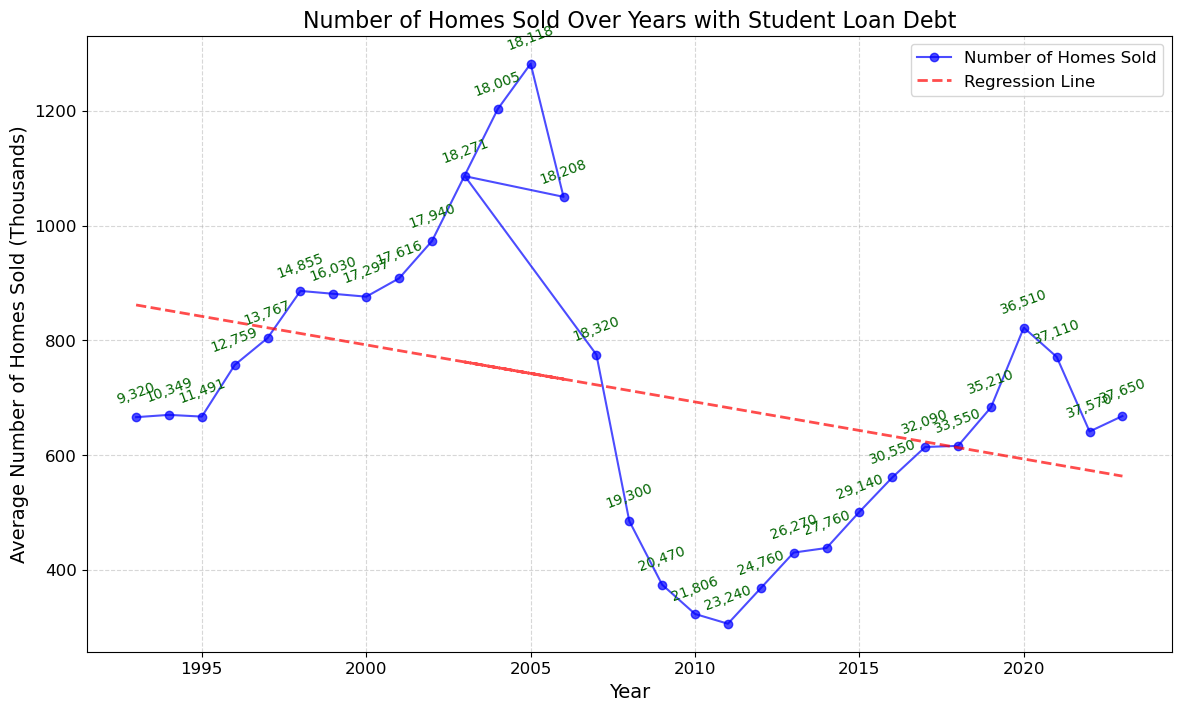

In [33]:
# Plot
plt.figure(figsize=(14, 8))
plt.plot(df_combined_filtered['Year'], df_combined_filtered['Average Total by Year (Thousands)'], marker='o', linestyle='-', color='blue', alpha=0.7, label='Number of Homes Sold')

# Annotate each data point with the corresponding average student loan debt
for i in range(df_combined_filtered.shape[0]):
    plt.text(df_combined_filtered['Year'].iloc[i], df_combined_filtered['Average Total by Year (Thousands)'].iloc[i] + 19, 
             f"{df_combined_filtered['Average Student Loan Debt'].iloc[i]:,.0f}", fontsize=10, 
             ha='center', va='bottom', color='darkgreen', rotation = 20)

# Calculate the regression line
X = df_combined_filtered['Year']
y = df_combined_filtered['Average Total by Year (Thousands)']
coefficients = np.polyfit(X, y, 1)
polynomial = np.poly1d(coefficients)
regression_line = polynomial(X)

# Plot the regression line
plt.plot(X, regression_line, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Regression Line')

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add titles and labels
plt.title('Number of Homes Sold Over Years with Student Loan Debt', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Number of Homes Sold (Thousands)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

 <h1> Liliana: Updates</h1>

In [12]:
import datetime as dt
import scipy.stats as st
from scipy.stats import linregress

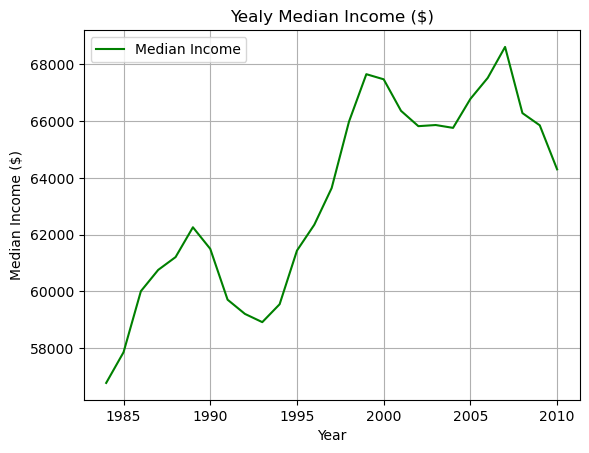

In [13]:
#Accessing data file 
file_path = 'Resources/MEHOINUSA672N.csv'
df = pd.read_csv(file_path)
df.head()

#Converting dates column format
date = df.iloc[:,0]
dt = pd.to_datetime(date)
df['Year'] = pd.DatetimeIndex(df['DATE']).year
del df['DATE']

#Renaming/Reorganizing Columns
df = df[['Year', 'MEHOINUSA672N']]
income_data = df.rename(columns={'MEHOINUSA672N': 'Median Income'})


#Plotting Data 
plot1 = income_data.plot(x='Year', y = 'Median Income', kind = 'line', color ='green')
plt.grid(True)
plt.title('Yealy Median Income ($)')
plt.ylabel('Median Income ($)')
plt.savefig('yearlymedinc.png')
plt.show()


In [14]:
#Summary Statistics

income_stats = income_data['Median Income'].describe()
income_stats.round(2) 


count       27.00
mean     63312.59
std       3462.53
min      56780.00
25%      60385.00
50%      63640.00
75%      66130.00
max      68610.00
Name: Median Income, dtype: float64

In [15]:
#Import houses sold data
file2_path = 'Resources/number_houses_sold.csv'
df2 = pd.read_csv(file2_path)
df2 = df2.dropna()
df2 = df2.replace(',','', regex = True)
df2 = df2.astype(int)
df2.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963,560,87,134,199,141
1,1964,565,90,146,200,129
2,1965,575,94,142,210,129
3,1966,461,84,113,166,99
4,1967,487,77,112,179,119


In [16]:
#Information of both Dataframes 
df2.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         61 non-null     int64
 1   Total (USA)  61 non-null     int64
 2   Northeast    61 non-null     int64
 3   MidWest      61 non-null     int64
 4   South        61 non-null     int64
 5   West         61 non-null     int64
dtypes: int64(6)
memory usage: 3.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           27 non-null     int32
 1   MEHOINUSA672N  27 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 452.0 bytes


In [17]:
#Summary Stats 
total_houses = df2['Total (USA)'].astype(int)
house_stats = total_houses.describe()
house_stats

count      61.000000
mean      655.213115
std       202.064191
min       306.000000
25%       509.000000
50%       641.000000
75%       757.000000
max      1283.000000
Name: Total (USA), dtype: float64

In [18]:
#Merging datasets by year (1984 - 2010) length of median income data 
merge_df = pd.merge(income_data, df2, on='Year')


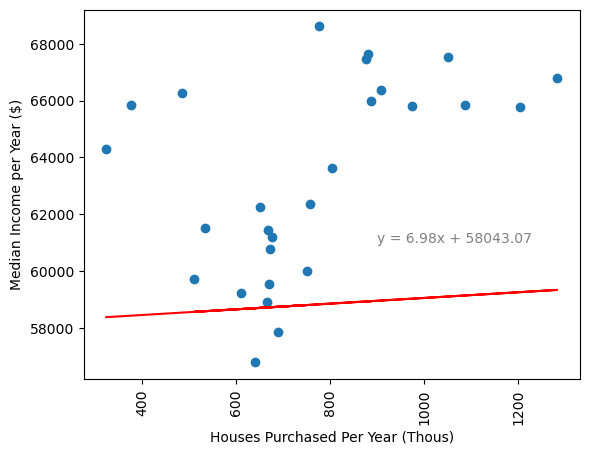

The correlation between both factors is 0.47


In [20]:
#Setting X and Y axis
income = merge_df['Median Income']
purchased = merge_df['Total (USA)']

#Linear Regression of Income and Homes purchased 
(slope, intercept, rvalue, pvalue, stderr) = linregress(purchased, income)
regress = purchased + slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Scatter plot and linear regression plot
plt.scatter(purchased, income) 
plt.plot(purchased, regress, 'r-')
plt.annotate(line_eq,(900, 61000), color = 'gray')
plt.xticks(rotation = 'vertical')
plt.xlabel('Houses Purchased Per Year (Thous)')
plt.ylabel('Median Income per Year ($)')
plt.savefig('incomeregress.png')
plt.show()

#Peasrson correlation
correlation = st.pearsonr(income, purchased)
print(f'The correlation between both factors is {round(correlation[0],2)}')

 <h1> Nedal: Updates</h1>

In [ ]:
# importing dataset 1
House_prices ='Resources/MSPUS.csv'
# House_prices = "../Resources/MSPUS.csv"
House_prices_df = pd.read_csv(House_prices)
House_prices_df.head()

In [ ]:
# cleaning dataset 1
House_prices_df=House_prices_df.rename(columns={'MSPUS': 'Price'})
House_prices_df.head(20)

In [ ]:
#adjusting types
House_prices_df.dtypes

In [ ]:
# more cleaning
House_prices_df ["DATE"] = pd. to_datetime (House_prices_df ["DATE"])
House_prices_df ["Year"] = House_prices_df["DATE"].dt.year
House_prices_df.head()

In [ ]:
average_price_by_year = House_prices_df.groupby ("Year") ["Price" ].mean().reset_index()
average_price_by_year 

In [ ]:
# plotting dataset 1
plt.plot(average_price_by_year['Year'], average_price_by_year['Price'], marker='o')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("House Prices Over Time")
plt.grid(True)
plt.savefig('House Prices Over Time')
plt.show()

In [ ]:
#importing dataset 2
Houses_sold = 'Resources/number_houses_sold.csv'
HS_df = pd.read_csv(Houses_sold)
HS_df.head()

In [ ]:
#Cleaning the dataset 2
HS_df['Total by Regions'] = HS_df[['Northeast', 'MidWest', 'South', 'West']].sum(axis=1)
HS_df = HS_df.dropna(subset=['Year'])
HS_df['Year'] = HS_df['Year'].astype(int)
print("Cleaned Data:")
print(HS_df[['Year', 'Total by Regions']].head())

In [ ]:
HS_df = HS_df.groupby('Year')['Total by Regions'].mean().reset_index()

HS_df.columns = ['Year', 'Average Total by Year (Thousands)']


print("Average Total by Year DataFrame:")
print(HS_df)

In [ ]:
Clean_HS_df = HS_df[['Year', 'Average Total by Year (Thousands)']]
Clean_HS_df.head()

In [ ]:
# Statistics for DS 2
print("statistics for Totals:")
Clean_HS_df['Average Total by Year (Thousands)'].describe()

In [ ]:
#statistics for DS 1
average_price_by_year['Price'].describe()

In [ ]:
#merging datasets
merge_df = pd.merge(average_price_by_year, Clean_HS_df, on='Year')
merge_df

In [ ]:
#Setting X and Y axis
Price = merge_df['Price']
purchased = merge_df['Average Total by Year (Thousands)']

#Linear Regression of Income and Homes purchased 
(slope, intercept, rvalue, pvalue, stderr) = linregress(purchased, Price)
regress = purchased + slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Scatter plot and linear regression plot
plt.scatter(purchased, Price) 
plt.plot(purchased, regress, 'r-')
plt.annotate(line_eq,(900, 61000), color = 'gray')
plt.xticks(rotation = 'vertical')
plt.xlabel('Houses Purchased Per Year (Thous)')
plt.ylabel('Price')
plt.savefig('Price_regression')
plt.show()

#Peasrson correlation
correlation = st.pearsonr(Price, purchased)
print(f'The correlation between both factors is {round(correlation[0],2)}')

In [23]:
print("Seth Updates")

Seth Updates


In [25]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import ttest_ind

mortgage_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/MORTGAGE30US.csv"

In [26]:
mortgage_df = pd.read_csv(mortgage_data_path)

In [27]:
mortgage_df.dtypes

DATE             object
MORTGAGE30US    float64
dtype: object

In [31]:
mortgage_df["DATE"] = pd.to_datetime(mortgage_df["DATE"])

In [33]:
mortgage_df["YEAR"] = mortgage_df["DATE"].dt.year

In [35]:
average_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].mean().reset_index()
median_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].median().reset_index()

average_mortgage_by_year.rename(columns={"MORTGAGE30US": "Average Mortgage"}, inplace=True)
median_mortgage_by_year.rename(columns={'MORTGAGE30US': 'Median Mortgage'}, inplace=True)

average_mortgage_by_year.rename(columns={"YEAR": "Year"}, inplace=True)
median_mortgage_by_year.rename(columns={'YEAR': 'Year'}, inplace=True)

average_mortgage_by_year.head()

,Year,Average Mortgage
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115


In [37]:
education_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Years of School Completed by People 25 Years and Over.csv"

education_df = pd.read_csv(education_data_path)

education_df.dtypes

Year                           int64
Total                         object
0 to 4 years (Elementary)     object
5 to 8 years (Elementary)     object
1 to 3 years (High School)    object
4 years (High School)         object
1 to 3 years (College)        object
4 years or more (College)     object
dtype: object

In [39]:
for column in education_df.columns:
    education_df[column] = education_df[column].astype(str).str.replace(",", "").astype(float)

education_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,2203.0,5732.0,11998.0,64465.0,56659.0,85217.0
1,2021.0,224580.0,2074.0,5862.0,12118.0,62547.0,56942.0,85037.0
2,2020.0,223058.0,2106.0,5788.0,12313.0,61597.0,57552.0,83701.0
3,2019.0,221478.0,2181.0,6422.0,13372.0,62259.0,57428.0,79816.0
4,2018.0,219830.0,2129.0,6600.0,13682.0,62685.0,57810.0,76924.0


In [41]:
education_percentage_df = education_df.copy()

In [43]:
for column in education_percentage_df.columns[2:]:
    education_percentage_df[column] = education_percentage_df[column] / education_percentage_df["Total"] * 100

education_percentage_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,0.973598,2.533212,5.302421,28.489796,25.039996,37.660977
1,2021.0,224580.0,0.923502,2.610206,5.395850,27.850655,25.354885,37.864903
2,2020.0,223058.0,0.944149,2.594841,5.520089,27.614791,25.801361,37.524321
3,2019.0,221478.0,0.984748,2.899611,6.037620,28.110693,25.929438,36.037891
4,2018.0,219830.0,0.968476,3.002320,6.223900,28.515216,26.297594,34.992494


In [45]:
homes_data = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Number_Houses_Sold.csv"

In [47]:
homes_df = pd.read_csv(homes_data)
homes_df.dtypes

Year           float64
Total (USA)     object
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

In [49]:
homes_df

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560,87.0,134.0,199.0,141.0
1,1964.0,565,90.0,146.0,200.0,129.0
2,1965.0,575,94.0,142.0,210.0,129.0
3,1966.0,461,84.0,113.0,166.0,99.0
4,1967.0,487,77.0,112.0,179.0,119.0
...,...,...,...,...,...,...
59,2022.0,641,33.0,66.0,392.0,150.0
60,2023.0,668,34.0,68.0,413.0,153.0
61,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
for column in homes_df.columns:
    homes_df[column] = homes_df[column].astype(str).str.replace(",", "").astype(float)
homes_df.dtypes

Year           float64
Total (USA)    float64
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

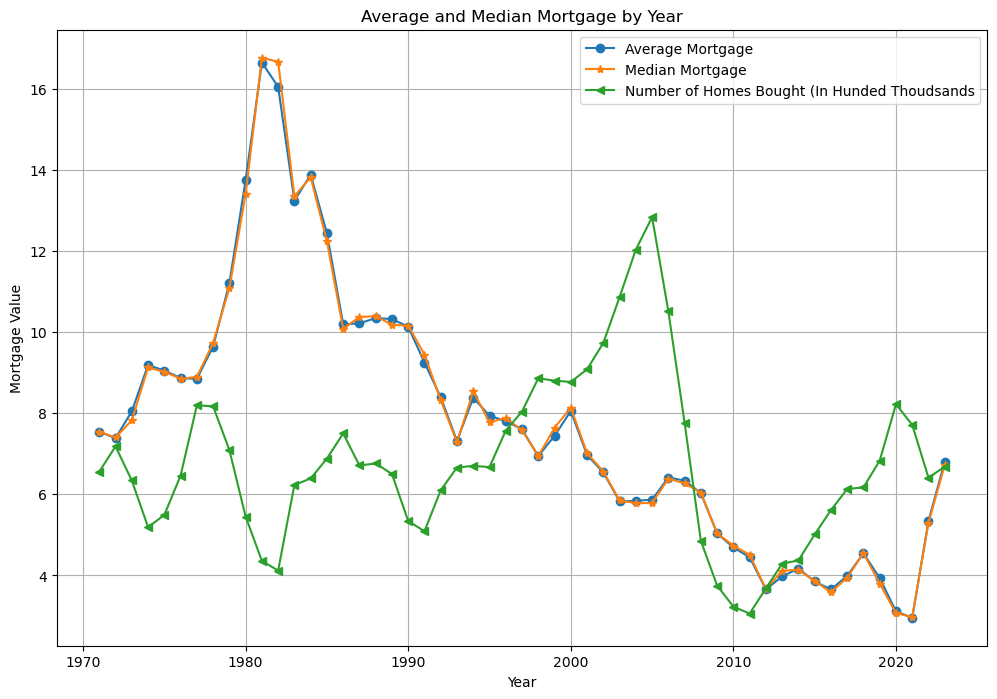

In [53]:
med_avg_merged = pd.merge(average_mortgage_by_year, median_mortgage_by_year, on='Year')
med_avg_merged = pd.merge(med_avg_merged, homes_df, on='Year')


plt.figure(figsize=(12, 8))
plt.plot(med_avg_merged["Year"], med_avg_merged["Average Mortgage"], marker="o", label="Average Mortgage")
plt.plot(med_avg_merged["Year"], med_avg_merged["Median Mortgage"], marker="*", label="Median Mortgage")
plt.plot(med_avg_merged["Year"], med_avg_merged["Total (USA)"]/100, marker="<", label="Number of Homes Bought (In Hunded Thoudsands")
plt.xlabel('Year')
plt.ylabel('Mortgage Value')
plt.title('Average and Median Mortgage by Year')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
homes_mortgage_merge = pd.merge(average_mortgage_by_year, homes_df, on="Year")

corr_mort_homes = homes_mortgage_merge[["Average Mortgage", "Total (USA)"]].corr()

In [57]:
corr_mort_homes **2

,Average Mortgage,Total (USA)
Average Mortgage,1.000000,0.009014
Total (USA),0.009014,1.000000


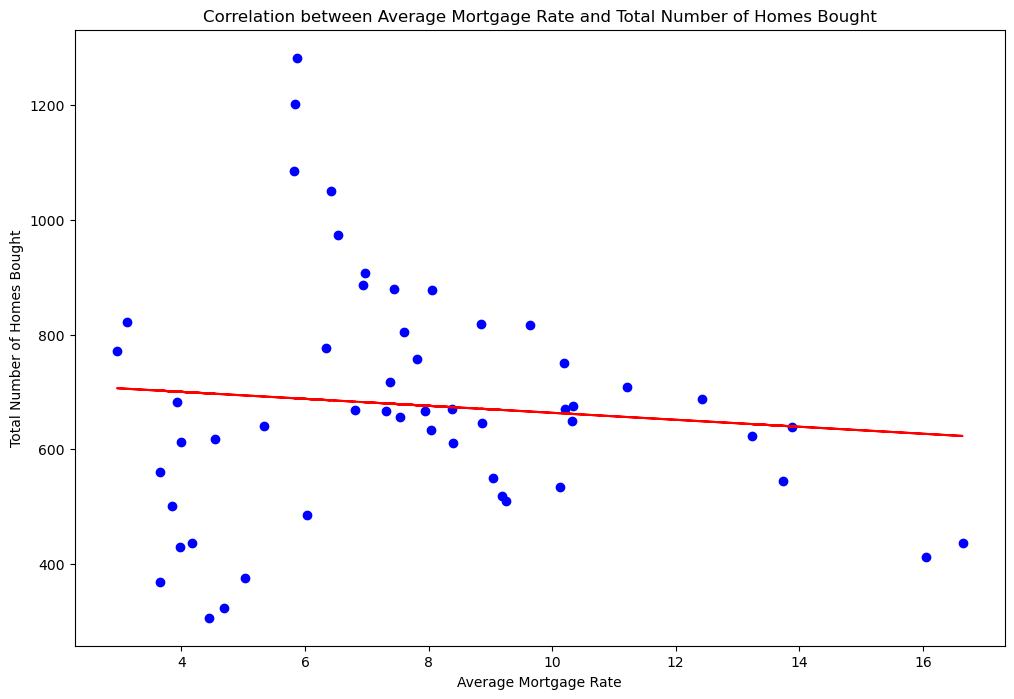

In [59]:
x = homes_mortgage_merge["Average Mortgage"]
y = homes_mortgage_merge["Total (USA)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue')
plt.plot(x, slope * x + intercept, color = "red")
plt.title("Correlation between Average Mortgage Rate and Total Number of Homes Bought")
plt.xlabel("Average Mortgage Rate")
plt.ylabel("Total Number of Homes Bought")

# Show the plot
plt.show()

In [61]:
education_homes_df = pd.merge(education_df, homes_df, on='Year')

ed_corr1 = education_homes_df[['0 to 4 years (Elementary)','Total (USA)']].corr()
ed_corr2 = education_homes_df[['5 to 8 years (Elementary)','Total (USA)']].corr()
ed_corr3 = education_homes_df[['1 to 3 years (High School)','Total (USA)']].corr()
ed_corr4 = education_homes_df[['4 years (High School)','Total (USA)']].corr()
ed_corr5 = education_homes_df[['1 to 3 years (College)','Total (USA)']].corr()
ed_corr6 = education_homes_df[['4 years or more (College)','Total (USA)']].corr()

ed_corr1_squared = ed_corr1 ** 2
ed_corr2_squared = ed_corr2 ** 2
ed_corr3_squared = ed_corr3 ** 2
ed_corr4_squared = ed_corr4 ** 2
ed_corr5_squared = ed_corr5 ** 2
ed_corr6_squared = ed_corr6 ** 2

(ed_corr1_squared, ed_corr2_squared, ed_corr3_squared, ed_corr4_squared, ed_corr5_squared, ed_corr6_squared)

(                           0 to 4 years (Elementary)  Total (USA)
 0 to 4 years (Elementary)                   1.000000     0.065425
 Total (USA)                                 0.065425     1.000000,
                            5 to 8 years (Elementary)  Total (USA)
 5 to 8 years (Elementary)                   1.000000     0.060936
 Total (USA)                                 0.060936     1.000000,
                             1 to 3 years (High School)  Total (USA)
 1 to 3 years (High School)                    1.000000     0.005885
 Total (USA)                                   0.005885     1.000000,
                        4 years (High School)  Total (USA)
 4 years (High School)               1.000000     0.044179
 Total (USA)                         0.044179     1.000000,
                         1 to 3 years (College)  Total (USA)
 1 to 3 years (College)                1.000000     0.038393
 Total (USA)                           0.038393     1.000000,
                          

In [63]:
before_2010 = homes_df[homes_df["Year"] < 2010]["Total (USA)"]
after_2010 = homes_df[homes_df["Year"] >= 2010]["Total (USA)"]

t_stat, p_value = ttest_ind(before_2010, after_2010)

t_stat, p_value


(2.2295622616388195, 0.029596047870472802)

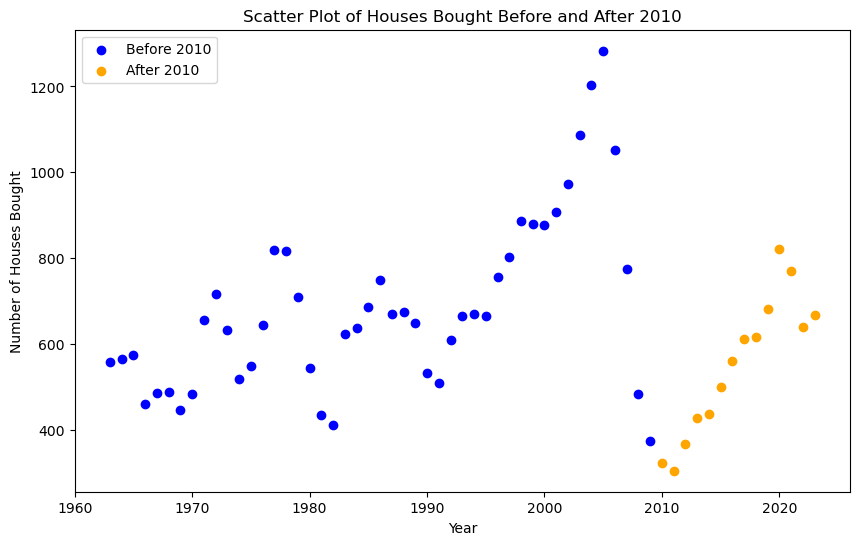

In [65]:
# Scatter plot
plt.figure(figsize=(10, 6))

x_before = homes_df[homes_df["Year"] < 2010]["Year"]
y_before = before_2010

x_after = homes_df[homes_df["Year"] >= 2010]["Year"]
y_after = after_2010

plt.scatter(x_before, y_before, color='blue', label='Before 2010')

plt.scatter(x_after, y_after, color='orange', label='After 2010')

plt.xlabel('Year')
plt.ylabel('Number of Houses Bought')
plt.title('Scatter Plot of Houses Bought Before and After 2010')
plt.legend(loc='upper left')
plt.show()